In [3]:
#使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
import pandas as pd

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 设置 Pandas 显示选项
pd.set_option('display.max_rows', 100)  # 设置最多显示的行数
pd.set_option('display.max_columns', 50)  # 设置最多显示的列数
pd.set_option('display.width', 1000)  # 设置显示的宽度
pd.set_option('display.max_colwidth', None)  # 设置列内容的最大宽度为无限制

# 查看数据集
print(df)

       label  type  site_admin  company   blog  location  hireable                                                                                                                                                               bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0      Human  True       False    False  False     False     False                                                                                                                                                               NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1      Human  True       False    False   True     False      True                                                                                                     I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00

In [4]:
#使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
import pandas as pd

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 查看数据集的前 5 行
print("数据集的前 5 行:")
print(df.head())

# 查看数据集的基本信息
print("\n数据集的基本信息:")
df.info()

# 生成数据的描述性统计信息
print("\n数据的描述性统计信息:")
print(df.describe())

数据集的前 5 行:
   label  type  site_admin  company   blog  location  hireable                                                            bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                            NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True                     Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    

In [9]:
#对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
import pandas as pd

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# created_at: 创建时间
# updated_at: 更新时间

# 格式化创建时间和更新时间
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df['formatted_created_at'] = df['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
else:
    print("警告：数据框中没有名为 'created_at' 的列")

if 'updated_at' in df.columns:
    df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
    df['formatted_updated_at'] = df['updated_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
else:
    print("警告：数据框中没有名为 'updated_at' 的列")

# 查看格式化后的数据
print(df[['created_at', 'formatted_created_at', 'updated_at', 'formatted_updated_at']])

                     created_at formatted_created_at                updated_at formatted_updated_at
0     2011-09-26 17:27:03+00:00  2011-09-26 17:27:03 2023-10-13 11:21:10+00:00  2023-10-13 11:21:10
1     2015-06-29 10:12:46+00:00  2015-06-29 10:12:46 2023-10-07 06:26:14+00:00  2023-10-07 06:26:14
2     2008-08-29 16:20:03+00:00  2008-08-29 16:20:03 2023-10-02 02:11:21+00:00  2023-10-02 02:11:21
3     2014-05-20 18:43:09+00:00  2014-05-20 18:43:09 2023-10-12 12:54:59+00:00  2023-10-12 12:54:59
4     2012-08-16 14:19:13+00:00  2012-08-16 14:19:13 2023-10-06 11:58:41+00:00  2023-10-06 11:58:41
...                         ...                  ...                       ...                  ...
19763 2014-07-02 23:27:34+00:00  2014-07-02 23:27:34 2023-08-15 16:38:34+00:00  2023-08-15 16:38:34
19764 2017-12-06 21:56:31+00:00  2017-12-06 21:56:31 2023-07-26 18:32:25+00:00  2023-07-26 18:32:25
19765 2015-11-14 14:44:05+00:00  2015-11-14 14:44:05 2022-08-23 21:09:49+00:00  2022-08-23 21:09:49


In [11]:
#对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
import pandas as pd
import numpy as np

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# public_repos: 公共仓库数量
# public_gists: 公共gist数量
# followers: 关注者数量
# following: 关注的人数量

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    if col in df.columns:
        # 处理零值或负值
        df[col] = df[col].apply(lambda x: max(x, 1))
        df[f'log_{col}'] = np.log(df[col])
    else:
        print(f"警告：数据框中没有名为 '{col}' 的列")

# 查看对数变换后的数据
print(df[['public_repos', 'log_public_repos', 'public_gists', 'log_public_gists', 'followers', 'log_followers', 'following', 'log_following']])

       public_repos  log_public_repos  public_gists  log_public_gists  followers  log_followers  following  log_following
0                26          3.258097             1          0.000000          5       1.609438          1       0.000000
1                30          3.401197             3          1.098612          9       2.197225          6       1.791759
2               103          4.634729            49          3.891820       1212       7.100027        221       5.398163
3                49          3.891820             1          0.000000         84       4.430817          2       0.693147
4                11          2.397895             1          0.000000          6       1.791759          2       0.693147
...             ...               ...           ...               ...        ...            ...        ...            ...
19763            36          3.583519            16          2.772589         11       2.397895          4       1.386294
19764            16     

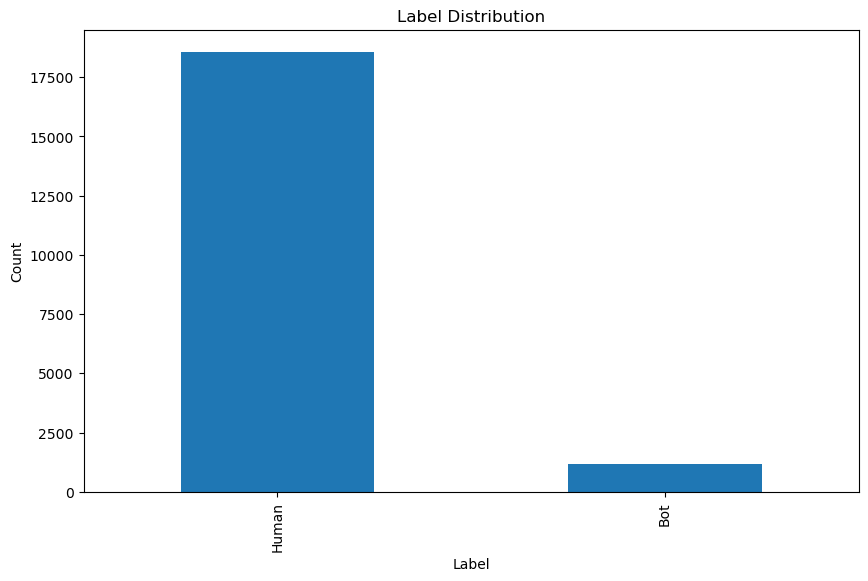

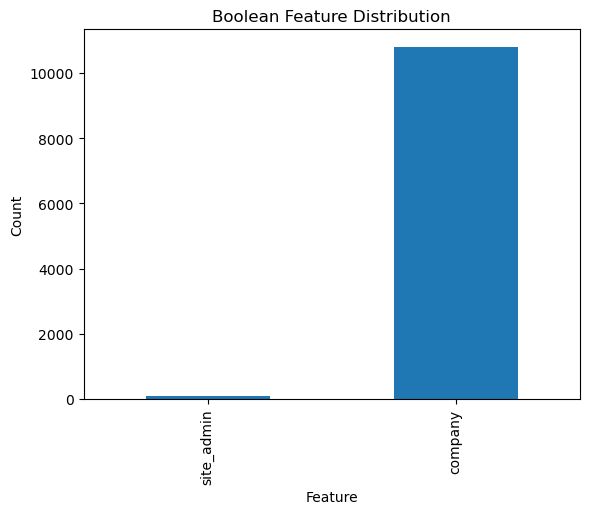

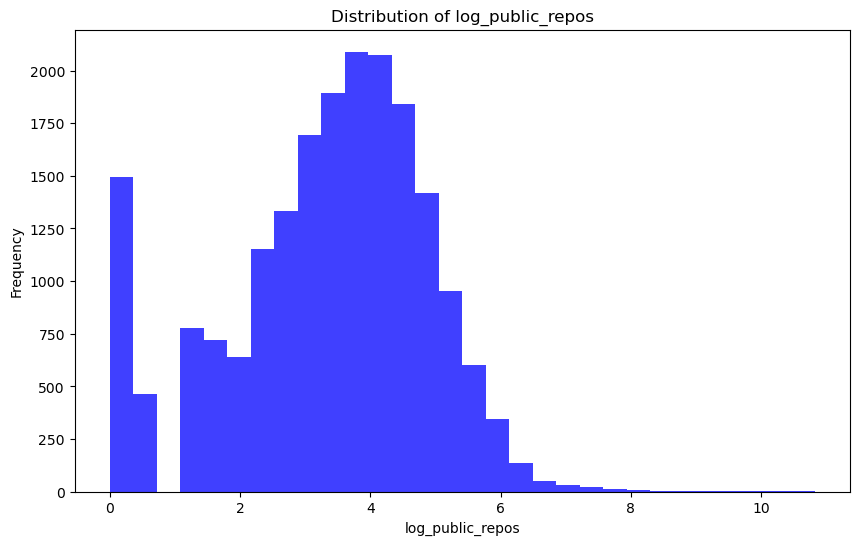

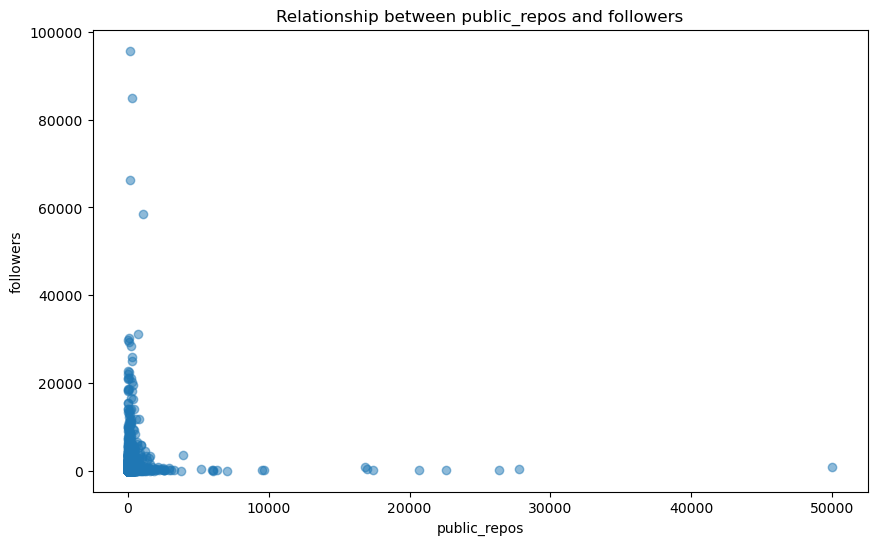

c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

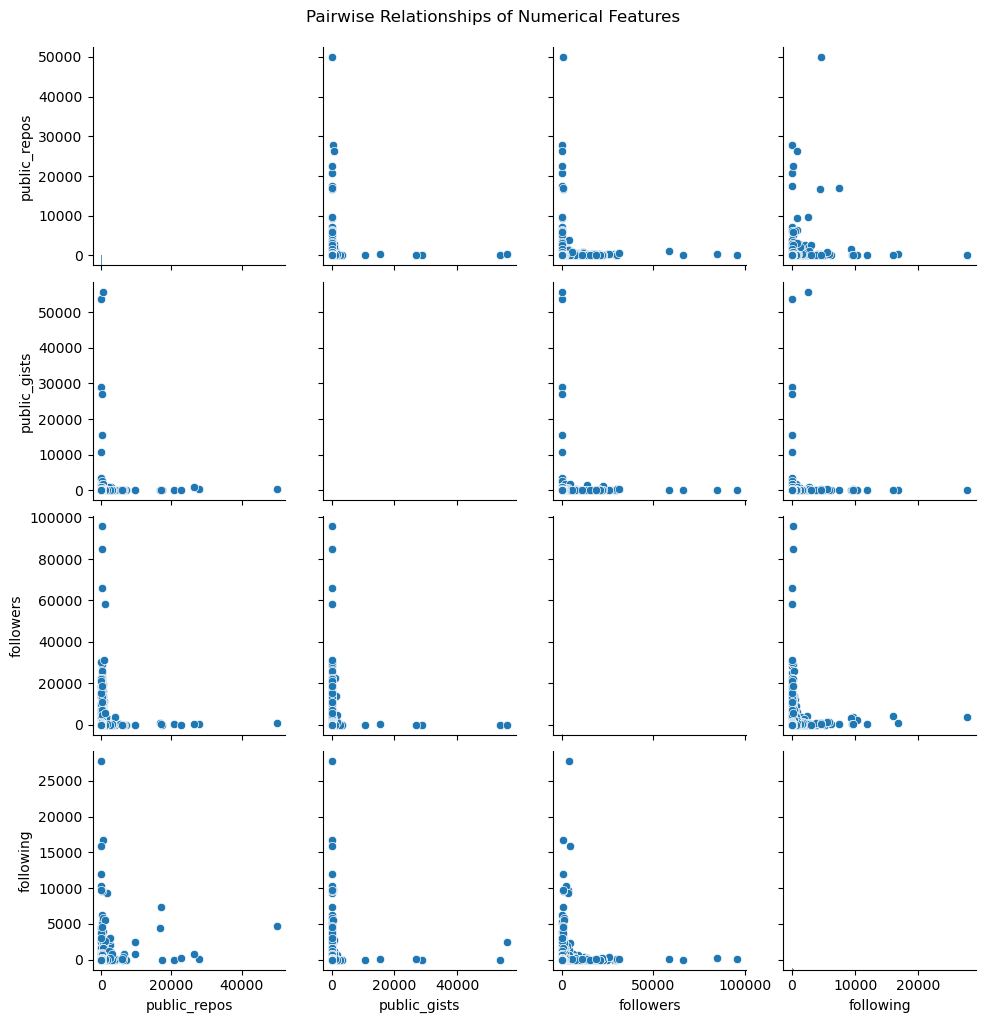

In [14]:
#使用Matplotlib绘制图表
#绘制条形图：展示label列的类别分布。
#绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
#绘制直方图：展示log_public_repos的对数变换后的数据分布。
#绘制散点图：展示public_repos与followers之间的关系。
#绘制散点矩阵：展示多个数值型特征之间的成对关系。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 将无穷大值转换为 NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 可选：填充 NaN 值，例如用 0 填充
df.fillna(0, inplace=True)

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    if col in df.columns:
        # 处理零值或负值
        df[col] = df[col].apply(lambda x: max(x, 1))
        df[f'log_{col}'] = np.log(df[col])
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame")

# 1. 条形图：展示 label 列的类别分布
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. 堆积柱状图：展示多个布尔特征的分布
boolean_features = ['site_admin', 'company']  # 假设这些列是布尔特征
boolean_df = df[boolean_features].sum()
boolean_df.plot(kind='bar', stacked=True)
plt.title('Boolean Feature Distribution')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

# 3. 直方图：展示 log_public_repos 的对数变换后的数据分布
plt.figure(figsize=(10, 6))
plt.hist(df['log_public_repos'], bins=30, alpha=0.75, color='blue')
plt.title('Distribution of log_public_repos')
plt.xlabel('log_public_repos')
plt.ylabel('Frequency')
plt.show()

# 4. 散点图：展示 public_repos 与 followers 之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(df['public_repos'], df['followers'], alpha=0.5)
plt.title('Relationship between public_repos and followers')
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.show()

# 5. 散点矩阵：展示多个数值型特征之间的成对关系
numerical_features = ['public_repos', 'public_gists', 'followers', 'following']
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()

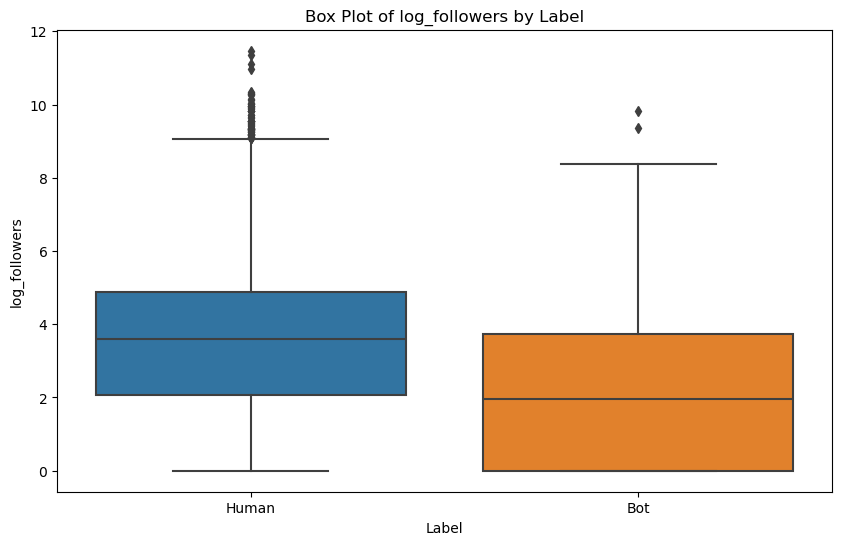

c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

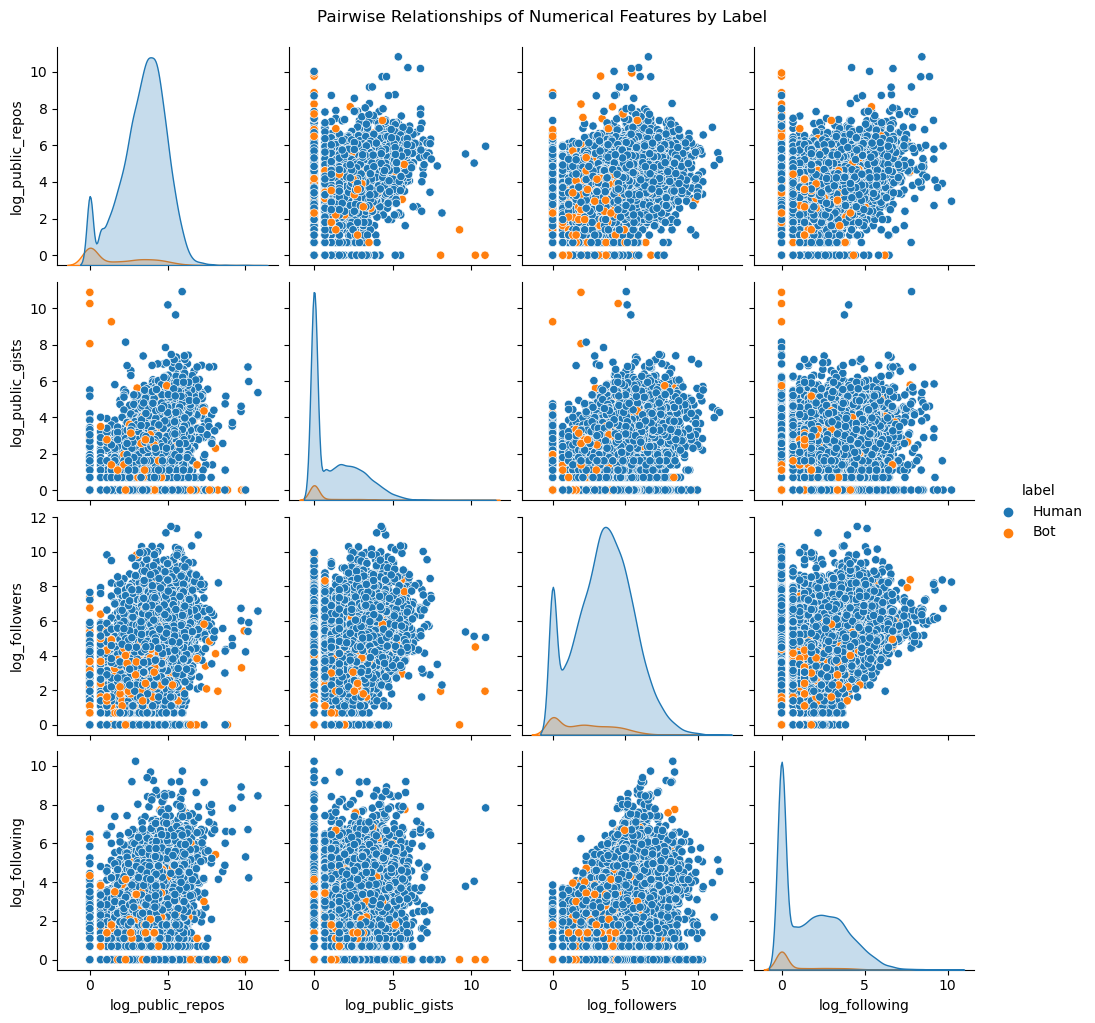

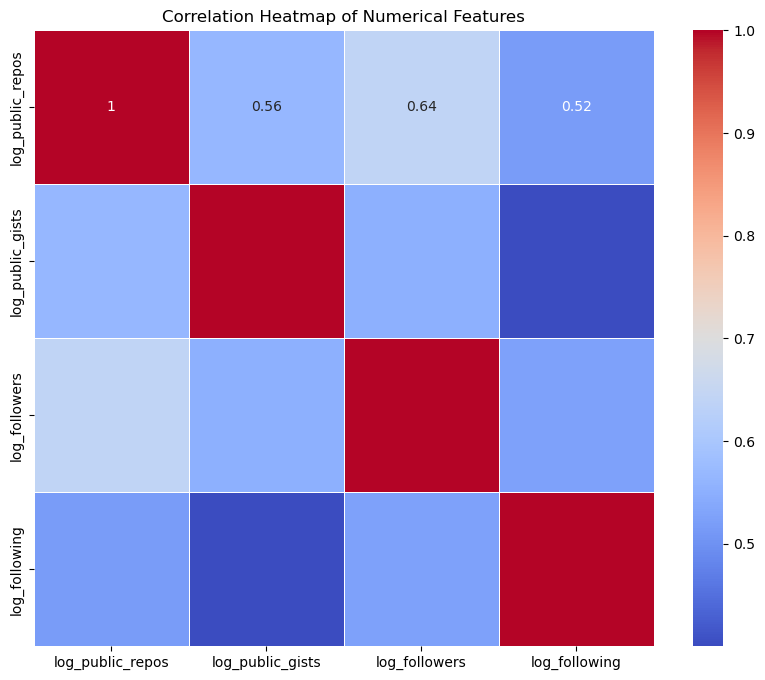

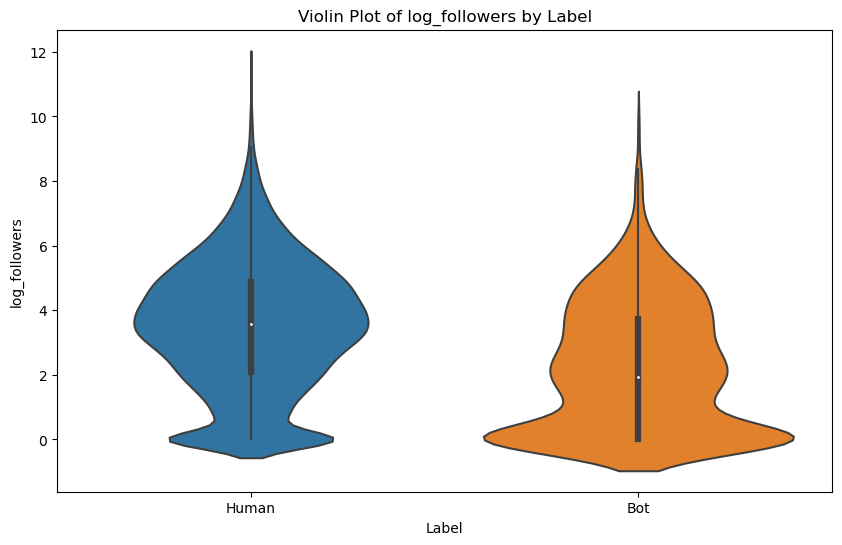

In [16]:
#使用Seaborn绘制图表
#绘制箱线图：展示不同label类别下log_followers的分布。
#绘制成对图：展示不同特征之间的成对关系，并根据label分类。
#绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
#绘制小提琴图：展示label与log_followers之间的分布差异。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 将无穷大值转换为 NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 可选：填充 NaN 值，例如用 0 填充
df.fillna(0, inplace=True)

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    if col in df.columns:
        # 处理零值或负值
        df[col] = df[col].apply(lambda x: max(x, 1))
        df[f'log_{col}'] = np.log(df[col])
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame")

# 1. 箱线图：展示不同 label 类别下 log_followers 的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Box Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()

# 2. 成对图：展示不同特征之间的成对关系，并根据 label 分类
numerical_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(df, vars=numerical_features, hue='label')
plt.suptitle('Pairwise Relationships of Numerical Features by Label', y=1.02)
plt.show()

# 3. 热图：展示 log_public_repos、log_public_gists、log_followers 和 log_following 等特征之间的相关性
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 4. 小提琴图：展示 label 与 log_followers 之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Violin Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()

In [2]:
#使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等
import pandas as pd
import ydata_profiling

# 设置文件路径
file_path = r"C:\Users\flipp\Desktop\Dase导论\github_bot_processed_data.csv"

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 生成交互式数据分析报告
profile = ydata_profiling.ProfileReport(df, title="GitHub Bot Processed Data Report", explorative=True)

# 保存报告为 HTML 文件
profile.to_file("github_bot_processed_data_report.html")

# 显示报告
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]